In [1]:
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

### Auxiliary functions

In [2]:
def general_plot(files, tag_column_idx, colors, xidx, yidx, ylabel, xlabel, title, order, 
                 fontsize=20, font='serif', figsize=(15, 10), bottom=0, top=20):
    """
    Plot results of the wandb dataframes given a xcolumn index and a ycolumn index
    """
    
    plt.rcParams["font.family"] = font
    plt.rcParams["font.size"] = fontsize
    patches = []
    fig, axs = plt.subplots(figsize=figsize)

    for idx, file in enumerate(files):
        df = pd.read_csv(file)
        label = df.columns[tag_column_idx].split('_')[0]
        axs.plot(df.iloc[:, xidx], df.iloc[:, yidx], color=colors[idx], label=label)
        if label.strip()!='L=0':
            axs.scatter(df.iloc[:, xidx], df.iloc[:, yidx], color=colors[idx], marker='D')
        patch = mpatches.Patch(color=colors[idx], label=label)
        patches.append(patch)

    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_ylim(bottom, top)
    #axs.set_xlim(300, 400)
    handles, labels = axs.get_legend_handles_labels()
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.savefig(title)

In [3]:
def create_dict(files_list):
    """
    For each dataframe on the files_list, get the value on column 1
    for the last trained epoch.
    """
    values = dict()
    for file in files_list:
        df = pd.read_csv(file)
        value = df.iloc[-1, 1]
        column = df.columns[1]
        values[column] = value
    return values

In [4]:
def associate_right_value(L_order, current_dict, tags):
    right_value = dict()
    
    for l, tag in zip(L_order, tags):
        right_value[str(l)] = current_dict[tag]
    
    return right_value

In [5]:
def get_mean_std(path, size):
    files = glob.glob(path)
    array = np.array([])
    for file in files:
        new_array = pd.read_csv(file).iloc[:, 1].values.reshape(1, size)
        if len(array) == 0:
            array = new_array
        else:
            array = np.concatenate((array, new_array), axis=0)
    
    return np.mean(array, axis=0), np.std(array, axis=0)

In [6]:
def plot_sgd_against_entropy(sgd_mean, sgd_std, entropy_mean, entropy_std,
                             sgd_label, entropy_label, xlabel, ylabel,
                             sgd_epochs, langevin,
                             fontsize=20, font='serif', figsize=(15, 10), bottom=0, top=20):
    
    plt.rcParams["font.family"] = font
    plt.rcParams["font.size"] = fontsize
    patches = []

    fig, axs = plt.subplots(figsize=figsize)

    axs.plot(np.arange(1, sgd_epochs + 1), sgd_mean, 'black')
    axs.fill_between(np.arange(1, sgd_epochs + 1),
                        sgd_mean - sgd_std,
                        sgd_mean + sgd_std,
                        color='black',
                        alpha=0.3)
    patch = mpatches.Patch(color='black', label=sgd_label)
    patches.append(patch)

    axs.plot(np.arange(langevin, sgd_epochs + langevin, langevin), entropy_mean, 'red')
    axs.scatter(np.arange(langevin, sgd_epochs + langevin, langevin), entropy_mean, color='red', s=30)
    axs.fill_between(np.arange(langevin, sgd_epochs + langevin, langevin),
                        entropy_mean - entropy_std,
                        entropy_mean + entropy_std,
                        color='red',
                        alpha=0.3)
    patch = mpatches.Patch(color='red', label=entropy_label)
    patches.append(patch)
    axs.legend(handles=patches)

    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_ylim(bottom, top)

## Analysis with L variation and fixed gamma

In [7]:
gamma = '3'

### Time analysis

In [8]:
times = sorted(glob.glob(f'../WANDB_RESULTS/HParamAnalysis/g={gamma}/time/**'))

In [9]:
for file in times:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} took {np.sum(df.iloc[:, 1])}')

Experiment L=0_B=400_g=3_lr=0.1_s40_det - time/training_time took 6696339.3046875
Experiment L=10_B=40_g=3_lr=0.1_s40_det - time/training_time took 7414180.84375
Experiment L=20_B=20_g=3_lr=0.1_s40_det - time/training_time took 7070323.59375
Experiment L=40_B=10_g=3_lr=0.1_s40_det - time/training_time took 6941695.3125
Experiment L=50_B=8_g=3_lr=0.1_s40_det - time/training_time took 6953768.5625
Experiment L=100_B=4_g=3_lr=0.1_s40_det - time/training_time took 6674662.375
Experiment L=200_B=2_g=3_lr=0.1_s40_det - time/training_time took 6491411.25


### Percentage errors on last epoch and the global minimum

In [10]:
errors = sorted(glob.glob(f'../WANDB_RESULTS/HParamAnalysis/g={gamma}/test_error/**'))

In [11]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had error = {round(df.iloc[-1, 1], 4)} % at epoch {df.iloc[-1, 0]}.')

Experiment L=0_B=400_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 9.34 % at epoch 400.
Experiment L=10_B=40_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 9.31 % at epoch 400.
Experiment L=20_B=20_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 9.0 % at epoch 400.
Experiment L=40_B=10_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 9.43 % at epoch 400.
Experiment L=50_B=8_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 9.61 % at epoch 400.
Experiment L=100_B=4_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 10.01 % at epoch 400.
Experiment L=200_B=2_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 10.5 % at epoch 400.


In [12]:
step = 200
for file in errors:
    df = pd.read_csv(file)
    df = df[df['Step'] == step]
    print(f'Experiment {df.columns[1]} had error = {round(df.iloc[0, 1], 4)} % at epoch {step}.')

Experiment L=0_B=400_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 9.33 % at epoch 200.
Experiment L=10_B=40_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 9.36 % at epoch 200.
Experiment L=20_B=20_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 9.43 % at epoch 200.
Experiment L=40_B=10_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 9.6 % at epoch 200.
Experiment L=50_B=8_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 10.02 % at epoch 200.
Experiment L=100_B=4_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 10.33 % at epoch 200.
Experiment L=200_B=2_g=3_lr=0.1_s40_det - general/percentage_errors_test had error = 12.21 % at epoch 200.


In [13]:
for file in errors:
    df = pd.read_csv(file)
    df = df[df['Step'] < 270]
    min_error = np.round(min(df.iloc[:, 1]), 4)
    epoch = df[np.round(df[df.columns[1]], 4)== min_error]['Step'].values[0]
    print(f'Experiment {df.columns[1]} \n Min error: {min_error}; Epoch: {epoch}.\n')

Experiment L=0_B=400_g=3_lr=0.1_s40_det - general/percentage_errors_test 
 Min error: 8.88; Epoch: 250.

Experiment L=10_B=40_g=3_lr=0.1_s40_det - general/percentage_errors_test 
 Min error: 8.91; Epoch: 260.

Experiment L=20_B=20_g=3_lr=0.1_s40_det - general/percentage_errors_test 
 Min error: 9.22; Epoch: 260.

Experiment L=40_B=10_g=3_lr=0.1_s40_det - general/percentage_errors_test 
 Min error: 9.6; Epoch: 200.

Experiment L=50_B=8_g=3_lr=0.1_s40_det - general/percentage_errors_test 
 Min error: 9.73; Epoch: 250.

Experiment L=100_B=4_g=3_lr=0.1_s40_det - general/percentage_errors_test 
 Min error: 10.33; Epoch: 200.

Experiment L=200_B=2_g=3_lr=0.1_s40_det - general/percentage_errors_test 
 Min error: 12.21; Epoch: 200.



In [14]:
times

['../WANDB_RESULTS/HParamAnalysis/g=3/time/wandb_export_2022-05-23T11_03_55.732-03_00.csv',
 '../WANDB_RESULTS/HParamAnalysis/g=3/time/wandb_export_2022-05-23T11_04_03.435-03_00.csv',
 '../WANDB_RESULTS/HParamAnalysis/g=3/time/wandb_export_2022-05-23T11_04_10.344-03_00.csv',
 '../WANDB_RESULTS/HParamAnalysis/g=3/time/wandb_export_2022-05-23T11_04_17.091-03_00.csv',
 '../WANDB_RESULTS/HParamAnalysis/g=3/time/wandb_export_2022-05-23T11_04_24.054-03_00.csv',
 '../WANDB_RESULTS/HParamAnalysis/g=3/time/wandb_export_2022-05-23T11_04_31.668-03_00.csv',
 '../WANDB_RESULTS/HParamAnalysis/g=3/time/wandb_export_2022-05-23T11_04_40.653-03_00.csv']

### L variation - pattern analysis of the test error

For each variation of L, a fixed gamma is considered

In [15]:
test_errors_1 = sorted(glob.glob(f'../WANDB_RESULTS/HParamAnalysis/g={gamma}/test_error/**'))

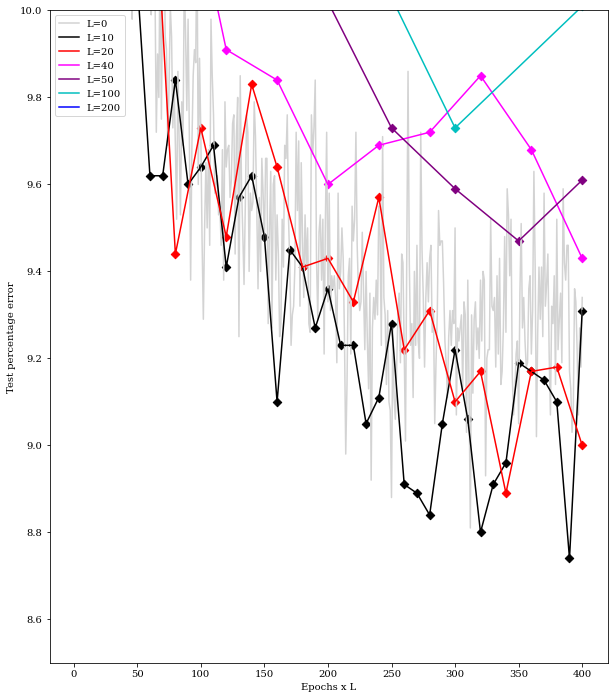

In [16]:
general_plot(test_errors_1,
             1, 
             ['lightgrey', 'black', 'red', 'magenta', 'purple', 'c', 'blue'], 
             0,
             1,
             'Test percentage error',
             'Epochs x L', 
             f'gamma_{gamma}_test_errors',
             [0, 1, 2, 3, 4, 5, 6],
             fontsize=20, font='serif', figsize=(10, 12), bottom=8.5, top=10)

### L variation - pattern analysis of the Cross Entropy Loss

For each variation of L, a fixed gamma is considered

In [17]:
train_loss_1 = sorted(glob.glob(f'../WANDB_RESULTS/HParamAnalysis/g={gamma}/train_loss/**'))

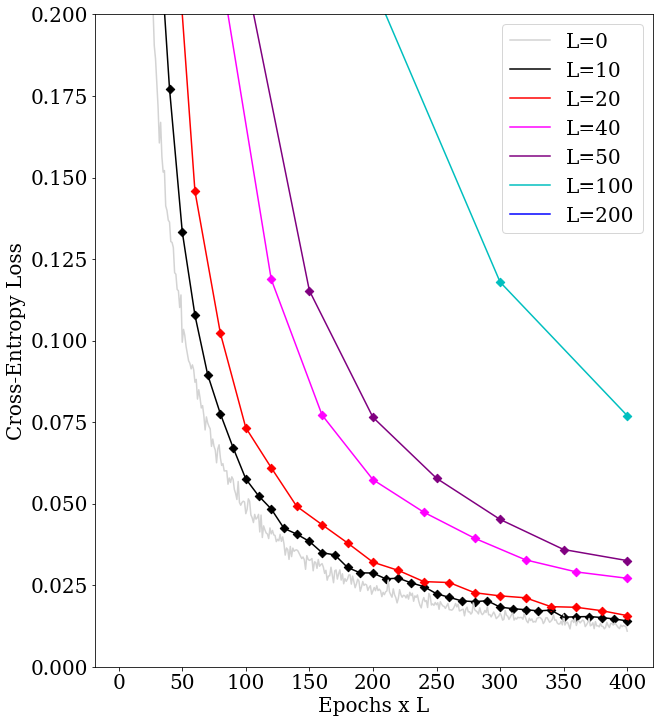

In [18]:
general_plot(train_loss_1,
             1, 
             ['lightgrey', 'black', 'red', 'magenta', 'purple', 'c', 'blue'], 
             0,
             1,
             'Cross-Entropy Loss',
             'Epochs x L', 
             f'gamma_{gamma}_loss',
             [0, 1, 2, 3, 4, 5, 6],
             fontsize=20, font='serif', figsize=(10, 12), bottom=0, top=0.2)